In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn import datasets
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import pyclustertend
import sklearn.mixture as mixture
import random

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')



In [2]:
df = pd.read_csv("movies.csv", encoding="latin1")
df.dropna()
print(df.dtypes)


id                             int64
budget                         int64
genres                        object
homePage                      object
productionCompany             object
productionCompanyCountry      object
productionCountry             object
revenue                      float64
runtime                        int64
video                         object
director                      object
actors                        object
actorsPopularity              object
actorsCharacter               object
originalTitle                 object
title                         object
originalLanguage              object
popularity                   float64
releaseDate                   object
voteAvg                      float64
voteCount                      int64
genresAmount                   int64
productionCoAmount             int64
productionCountriesAmount      int64
actorsAmount                   int64
castWomenAmount               object
castMenAmount                 object
d

Las columnas que se usaran para el clustering son: 
- budget
- revenue
- runtime
- popularity
- voteavg

In [3]:
df.describe()

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,249876.829300,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600
std,257380.109004,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


Se realizaran transforamciones para que estén los datos en la misma escala. 

In [16]:

datos1 = pd.DataFrame(df)
datos1 = datos1[['budget', 'revenue', 'runtime', 'popularity', 'voteAvg']]

X = np.array(datos1)

X_scale=sklearn.preprocessing.scale(X)

pyclustertend.hopkins(X,len(X))




0.01158451389667735

Como se puede observar con un hopkins de 0.012, se puede observar que los datos están uniformemente distribuidos. Por lo tanto si es factible realizar clustering de los datos.


In [19]:
pyclustertend.vat(X_scale)

Para observar cuantos grupos se deberían realizar se puede observar un gráfico de codo. 

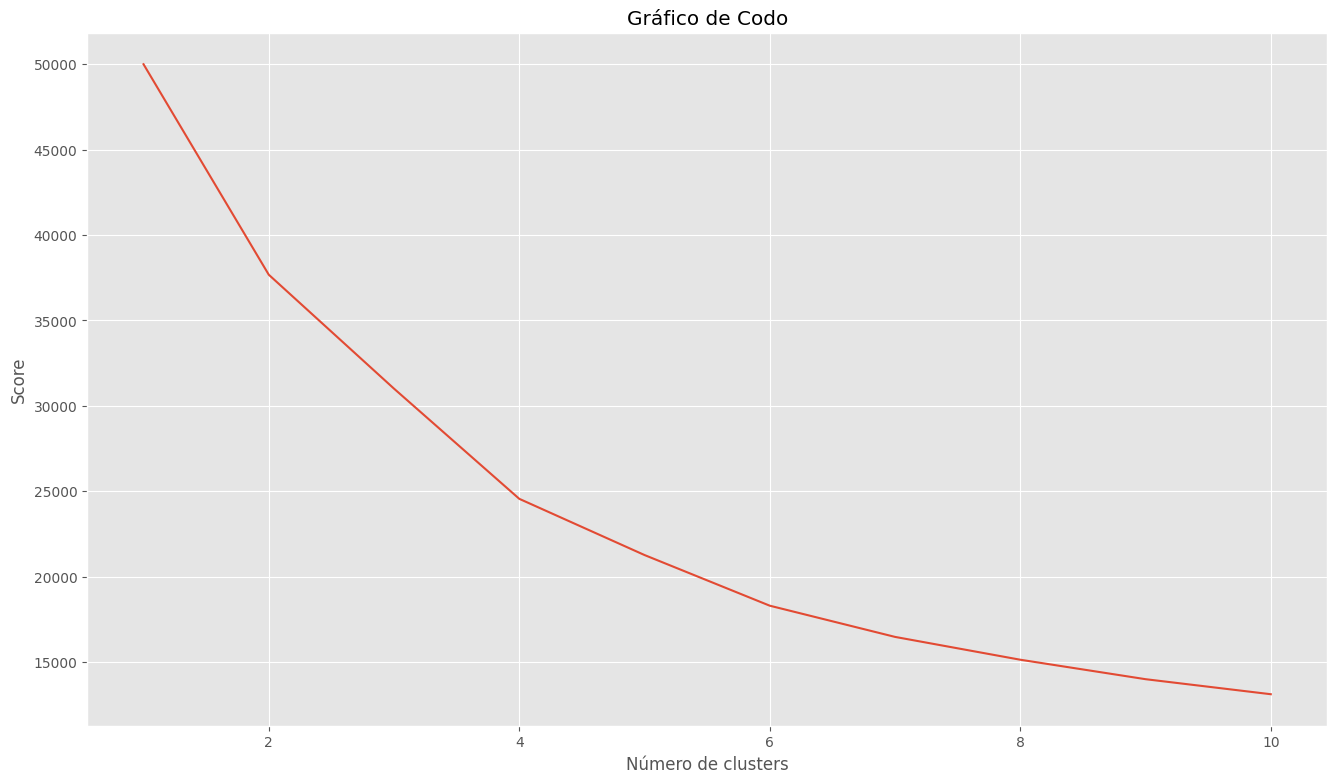

In [18]:
clusters = range(1,11)
wcss = []
for i in clusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)

plt.plot(clusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

Como se puede observar con el gráfico, el número de grupos que se pueden observar son entre 4 a 6. Para este caso, se usaran 4 grupos porque es en donde existe la mayor diferencia entre el punto anterior y el punto de 4 grupos. Por lo tanto, en este caso se utilizaran 4 grupos para el cluster. 
